In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import imageio.v2 as imageio
import os
from IPython.display import Image

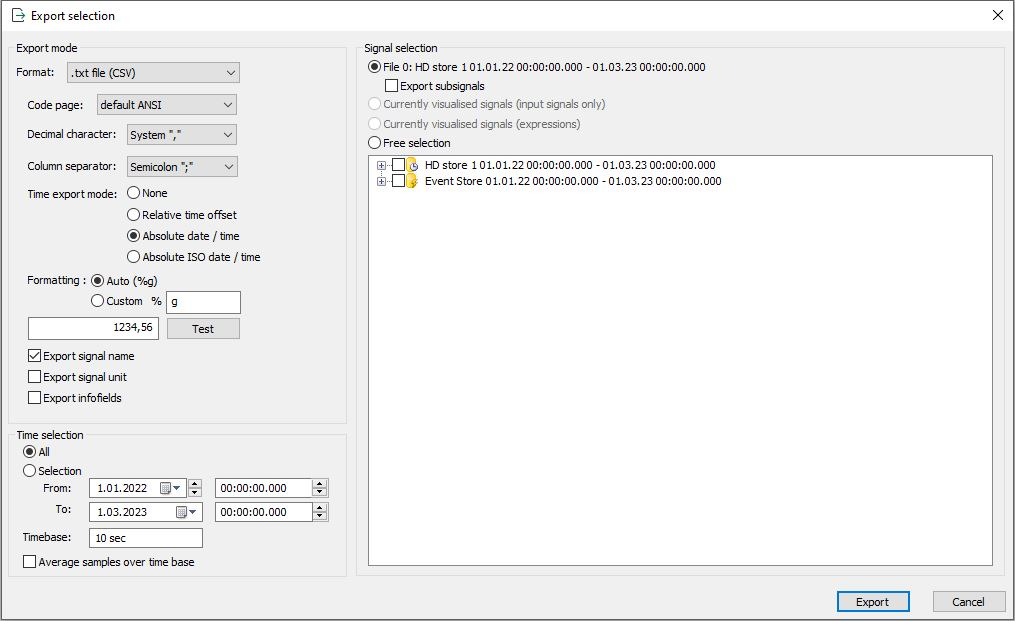

In [2]:
Image('/Users/aengin/Coursera/vib/images/data_export.jpg')

In [3]:
df=pd.read_csv('52M10.txt',error_bad_lines='skip',sep=';',skiprows=[0])
df.drop(list(df.filter(regex = 'max')), axis = 1, inplace = True)
df.drop(list(df.filter(regex = 'min')), axis = 1, inplace = True)
df.set_index('time',inplace = True)
df.columns = list(map(str, df.columns))
for i in range(0,len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].apply(lambda x: float(str(x).split()[0].replace(',', '.')))
    
df.astype(dtype="float32")
df.describe()
df.head()

19_MP2_KizginYag_52M10_MOT_IC_VIB  \
time                                                            
05.01.2022 19:50:00.000000                           0.892462   
05.01.2022 20:00:00.000000                           0.819978   
05.01.2022 20:10:00.000000                           0.970269   
05.01.2022 20:20:00.000000                           0.970269   
05.01.2022 20:30:00.000000                           0.861700   

                            19_MP2_KizginYag_52M10_MOT_IC_PEAK  \
time                                                             
05.01.2022 19:50:00.000000                                 NaN   
05.01.2022 20:00:00.000000                             1.72331   
05.01.2022 20:10:00.000000                             1.72331   
05.01.2022 20:20:00.000000                             1.90228   
05.01.2022 20:30:00.000000                             1.84514   

                            19_MP2_KizginYag_52M10_MOT_IC_RULMAN  \
time                                                               
05.01.2022 19:50:00.000000                               1.44334   
05.01.2022 20:00:00.000000                               1.60043   
05.01.2022 20:10:00.000000                               1.42569   
05.01.2022 20:20:00.000000                               1.42569   
05.01.2022 20:30:00.000000                               1.54487   

                            19_MP2_KizginYag_52M10_MOT_IC_UNB  \
time                                                            
05.01.2022 19:50:00.000000                                NaN   
05.01.2022 20:00:00.000000                           0.522322   
05.01.2022 20:10:00.000000                           0.721258   
05.01.2022 20:20:00.000000                           0.775784   
05.01.2022 20:30:00.000000                           0.729820   

                            19_MP2_KizginYag_52M10_MOT_IC_MEK_GEV  \
time                                                                
05.01.2022 19:50:00.000000                               0.002908   
05.01.2022 20:00:00.000000                               0.002563   
05.01.2022 20:10:00.000000                               0.003049   
05.01.2022 20:20:00.000000                               0.003049   
05.01.2022 20:30:00.000000                               0.002882   

                            19_MP2_KizginYag_52P10_POM_IC_VIB  \
time                                                            
05.01.2022 19:50:00.000000                            1.46058   
05.01.2022 20:00:00.000000                            1.34699   
05.01.2022 20:10:00.000000                            1.47125   
05.01.2022 20:20:00.000000                            1.47125   
05.01.2022 20:30:00.000000                            1.50826   

                            19_MP2_KizginYag_52P10_POM_IC_PEAK  \
time                                                             
05.01.2022 19:50:00.000000                                 NaN   
05.01.2022 20:00:00.000000                             4.67538   
05.01.2022 20:10:00.000000                             4.67538   
05.01.2022 20:20:00.000000                             5.66693   
05.01.2022 20:30:00.000000                             5.38452   

                            19_MP2_KizginYag_52P10_POM_IC_RULMAN  \
time                                                               
05.01.2022 19:50:00.000000                                   NaN   
05.01.2022 20:00:00.000000                              0.109651   
05.01.2022 20:10:00.000000                              0.138771   
05.01.2022 20:20:00.000000                              0.112687   
05.01.2022 20:30:00.000000                              0.112687   

                            19_MP2_KizginYag_52P10_POM_IC_UNB  
time                                                           
05.01.2022 19:50:00.000000                           0.478513  
05.01.2022 20:00:00.000000                           0.506357  
05.01.2022 20:10:00.000000              

In [4]:
#1.5xIQR defined as outlier
q1=np.zeros(shape=(1,len(df.columns)))
q3=np.zeros(shape=(1,len(df.columns)))
iqr=np.zeros(shape=(1,len(df.columns)))
out_low=np.zeros(shape=(1,len(df.columns)))
out_high=np.zeros(shape=(1,len(df.columns)))

for i in range(len(df.columns)):
    q1[0,i]=df.iloc[:,i].quantile(0.25)
    q3[0,i]=df.iloc[:,i].quantile(0.75)
    iqr[0,i]=q3[0,i]-q1[0,i]
    out_low[0,i]=q1[0,i]-1.5*iqr[0,i]
    out_high[0,i]=q3[0,i]+1.5*iqr[0,i]
    df.insert(len(df.columns),i,((df.iloc[:,i]<out_low[0,i]) | (df.iloc[:,i]>out_high[0,i])))

for k in range(int(len(df.columns)/2)):
    df=df[df.loc[:,k]==False]
    
df.drop(df.columns[-int(len(df.columns)/2):],axis=1,inplace=True)

<IPython.core.display.Javascript object>


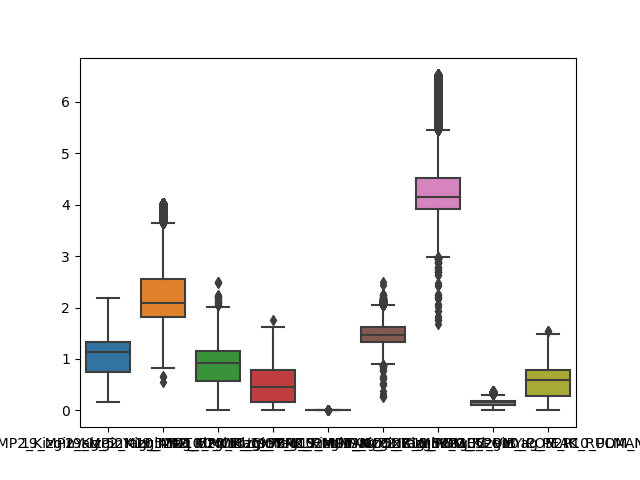

<AxesSubplot:>

In [5]:
%matplotlib notebook
sns.boxplot(data=df)

In [6]:
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
data=pd.DataFrame(imp.fit_transform(df),columns=df.columns,index=df.index)

<IPython.core.display.Javascript object>


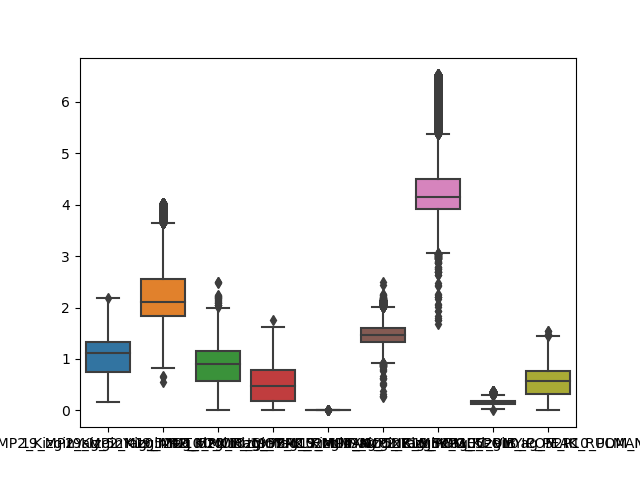

<AxesSubplot:>

In [7]:
%matplotlib notebook
sns.boxplot(data=data)

In [8]:
scaler=StandardScaler()
arr_norm=scaler.fit_transform(data)
df_norm=pd.DataFrame(arr_norm,index=data.index,columns=data.columns)
df_norm.describe()

19_MP2_KizginYag_52M10_MOT_IC_VIB  19_MP2_KizginYag_52M10_MOT_IC_PEAK  \
count                       3.266700e+04                        3.266700e+04   
mean                        2.676339e-14                       -1.638145e-14   
std                         1.000015e+00                        1.000015e+00   
min                        -2.584832e+00                       -2.817182e+00   
25%                        -1.005997e+00                       -7.318855e-01   
50%                         1.339916e-03                       -2.666008e-01   
75%                         5.807367e-01                        4.518876e-01   
max                         2.976018e+00                        2.891204e+00   

       19_MP2_KizginYag_52M10_MOT_IC_RULMAN  \
count                          3.266700e+04   
mean                          -9.810908e-14   
std                            1.000015e+00   
min                           -2.220126e+00   
25%                           -7.076537e-01   
50%                            1.709267e-01   
75%                            8.418434e-01   
max                            4.468790e+00   

       19_MP2_KizginYag_52M10_MOT_IC_UNB  \
count                       3.266700e+04   
mean                        1.053300e-14   
std                         1.000015e+00   
min                        -1.349906e+00   
25%                        -8.384029e-01   
50%                        -5.233721e-02   
75%                         7.670498e-01   
max                         3.424678e+00   

       19_MP2_KizginYag_52M10_MOT_IC_MEK_GEV  \
count                           3.266700e+04   
mean                            6.755303e-15   
std                             1.000015e+00   
min                            -3.633785e+00   
25%                            -1.092667e+00   
50%                             2.017198e-01   
75%                             8.456649e-01   
max                             4.628968e+00   

       19_MP2_KizginYag_52P10_POM_IC_VIB  19_MP2_KizginYag_52P10_POM_IC_PEAK  \
count                       3.266700e+04                        3.266700e+04   
mean                       -1.333095e-14                        3.306385e-14   
std                         1.000015e+00                        1.000015e+00   
min                        -5.103683e+00                       -3.794398e+00   
25%                        -5.512405e-01                       -5.973162e-01   
50%                         0.000000e+00                       -2.693136e-01   
75%                         5.998387e-01                        2.297537e-01   
max                         4.371719e+00                        3.135551e+00   

       19_MP2_KizginYag_52P10_POM_IC_RULMAN  19_MP2_KizginYag_52P10_POM_IC_UNB  
count                          3.266700e+04                       3.266700e+04  
mean                          -3.131327e-15                      -1.526021e-14  
std                            1.000015e+00                       1.000015e+00  
min                           -2.824261e+00                      -1.594565e+00  
25%                           -7.765093e-01                      -6.786958e-01  
50%                           -5.946353e-02                       1.126976e-01  
75%                            5.169176e-01                       6.888141e-01  
max                            3.754817e+00                       3.051527e+00

<IPython.core.display.Javascript object>


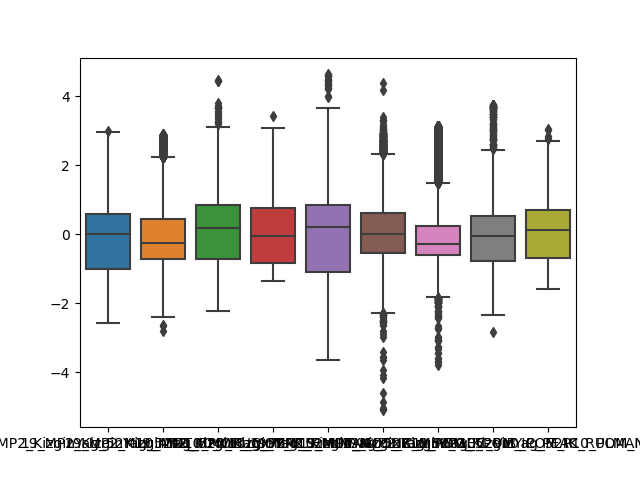

<AxesSubplot:>

In [9]:
%matplotlib notebook
sns.boxplot(data=df_norm)

In [10]:
#X_train,X_test=train_test_split(df_norm,train_size=1)
pca=PCA(n_components=0.95) # %95 of variance
pca.fit(df_norm)
reduced = pca.transform(df_norm)
df_norm.shape,reduced.shape # 9 boyuttan 6'a düşürdük 

((32667, 9), (32667, 6))

In [41]:
explained_variance = pca.explained_variance_ratio_
len(pca.singular_values_),sum(explained_variance[0:6])


(6, 0.9667706893426432)

<IPython.core.display.Javascript object>


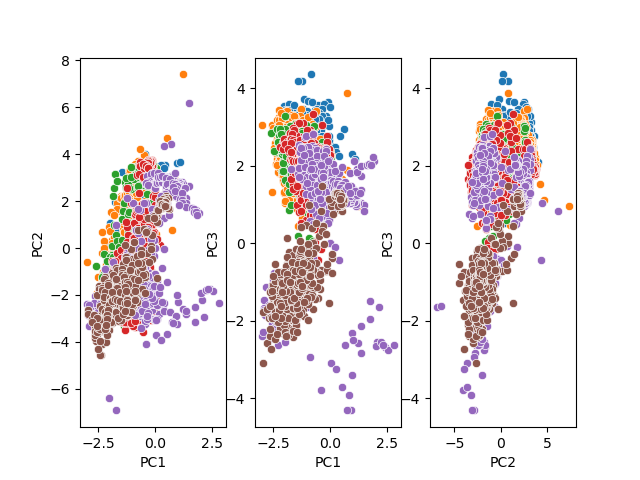

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

In [12]:
reduced_df=pd.DataFrame(reduced,index=df_norm.index,columns=["PC1","PC2","PC3","PC4","PC5","PC6"])
%matplotlib notebook
f, axes = plt.subplots(1, 3)
sns.scatterplot(data=reduced_df.iloc[0:1000],x="PC1",y="PC2",ax=axes[0])
sns.scatterplot(data=reduced_df.iloc[0:1000],x="PC1",y="PC3",ax=axes[1])
sns.scatterplot(data=reduced_df.iloc[0:1000],x="PC2",y="PC3",ax=axes[2])
sns.scatterplot(data=reduced_df.iloc[1000:2000],x="PC1",y="PC2",ax=axes[0])
sns.scatterplot(data=reduced_df.iloc[1000:2000],x="PC1",y="PC3",ax=axes[1])
sns.scatterplot(data=reduced_df.iloc[1000:2000],x="PC2",y="PC3",ax=axes[2])
sns.scatterplot(data=reduced_df.iloc[2000:3000],x="PC1",y="PC2",ax=axes[0])
sns.scatterplot(data=reduced_df.iloc[2000:3000],x="PC1",y="PC3",ax=axes[1])
sns.scatterplot(data=reduced_df.iloc[2000:3000],x="PC2",y="PC3",ax=axes[2])
sns.scatterplot(data=reduced_df.iloc[3000:4000],x="PC1",y="PC2",ax=axes[0])
sns.scatterplot(data=reduced_df.iloc[3000:4000],x="PC1",y="PC3",ax=axes[1])
sns.scatterplot(data=reduced_df.iloc[3000:4000],x="PC2",y="PC3",ax=axes[2])
sns.scatterplot(data=reduced_df.iloc[4000:5000],x="PC1",y="PC2",ax=axes[0])
sns.scatterplot(data=reduced_df.iloc[4000:5000],x="PC1",y="PC3",ax=axes[1])
sns.scatterplot(data=reduced_df.iloc[4000:5000],x="PC2",y="PC3",ax=axes[2])
sns.scatterplot(data=reduced_df.iloc[5000:5455],x="PC1",y="PC2",ax=axes[0])
sns.scatterplot(data=reduced_df.iloc[5000:5455],x="PC1",y="PC3",ax=axes[1])
sns.scatterplot(data=reduced_df.iloc[5000:5455],x="PC2",y="PC3",ax=axes[2])

In [13]:
reduced_df.index=pd.to_datetime(reduced_df.index,dayfirst=True)

In [16]:
corr=1e14*reduced_df.corr()
corr.style.background_gradient(cmap="PuBu",vmin=-1,vmax=1)

In [17]:
corr_df=df.corr()
corr_df.style.background_gradient(cmap="PuBu",vmin=-1,vmax=1)

In [19]:
len(reduced_df)

32667

C:\Users\aengin\AppData\Local\Temp\ipykernel_18688\2756750812.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


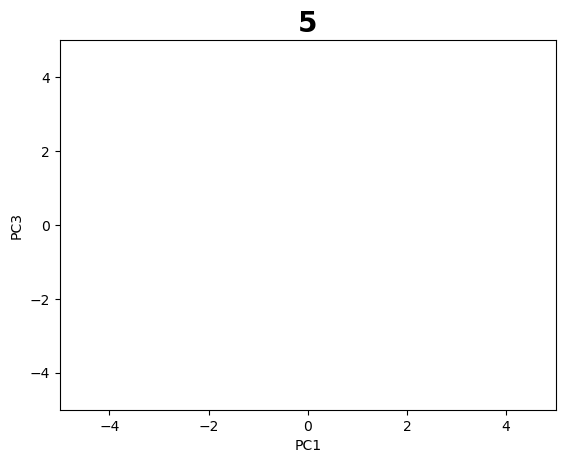

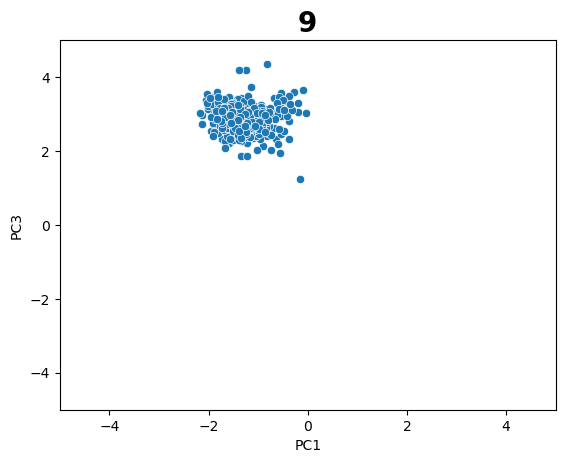

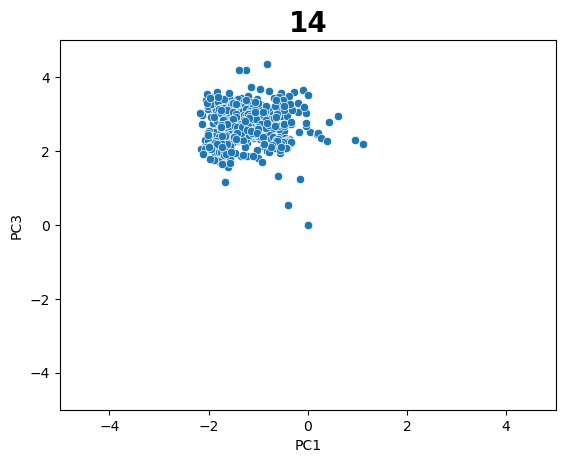

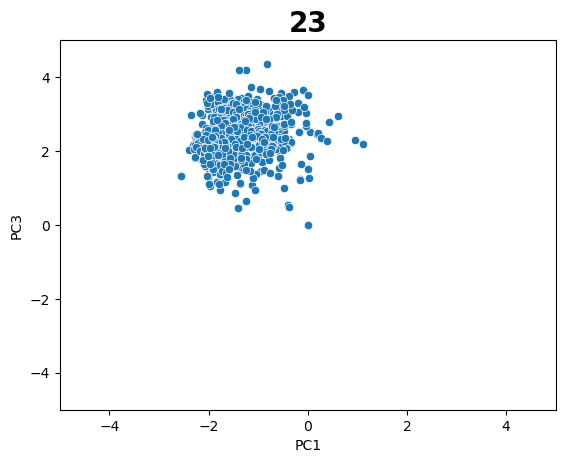

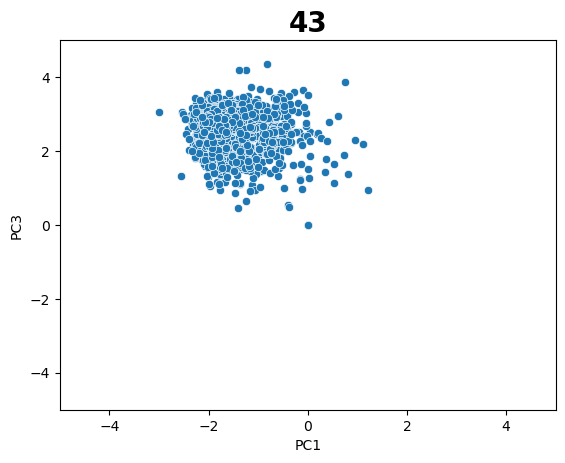

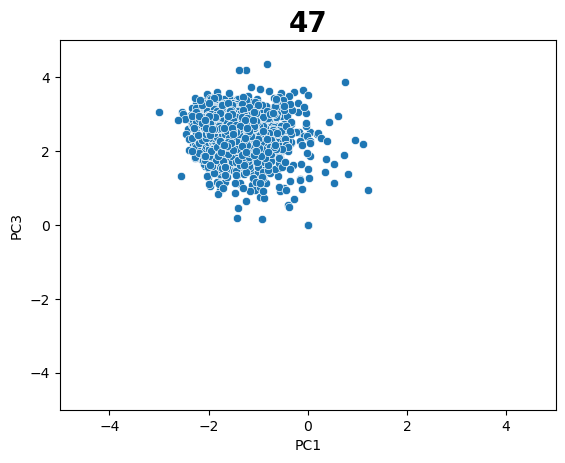

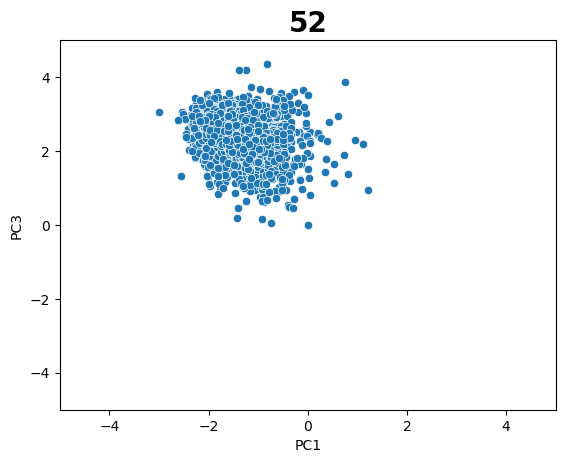

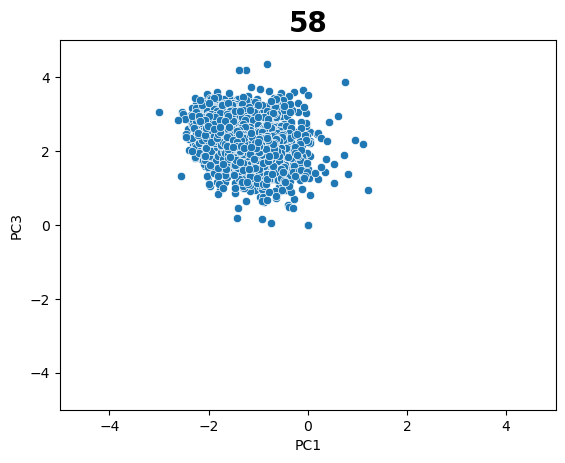

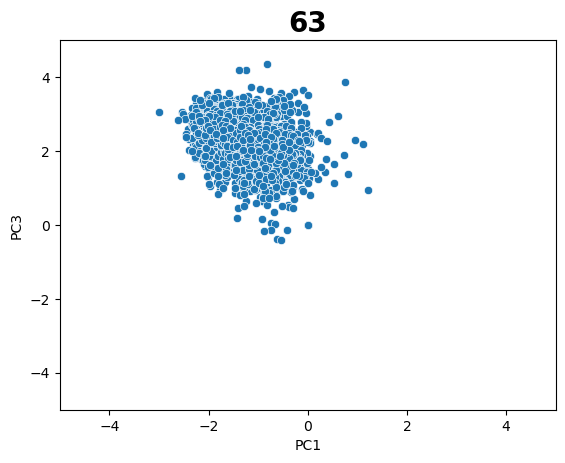

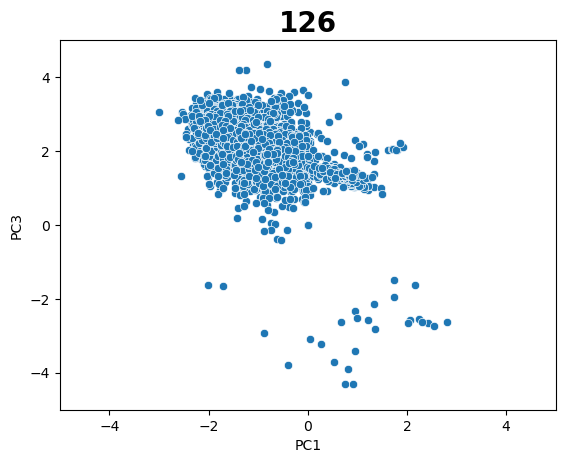

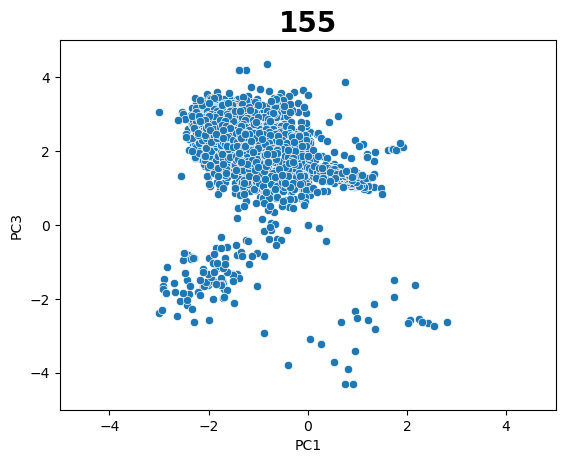

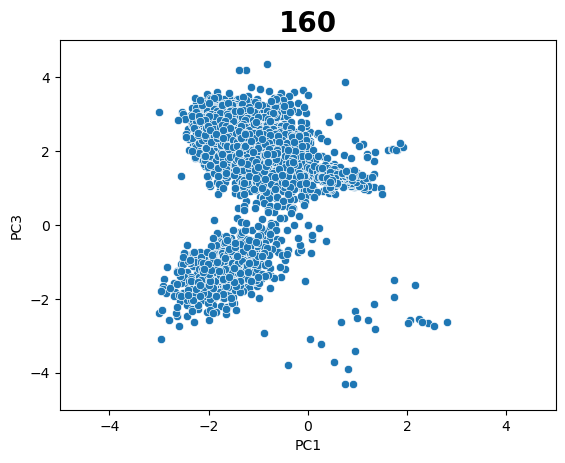

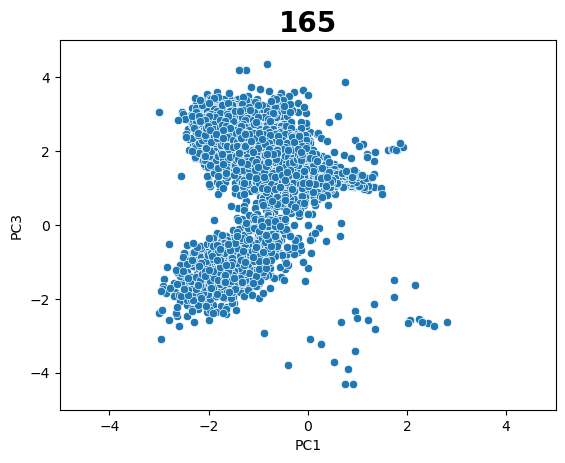

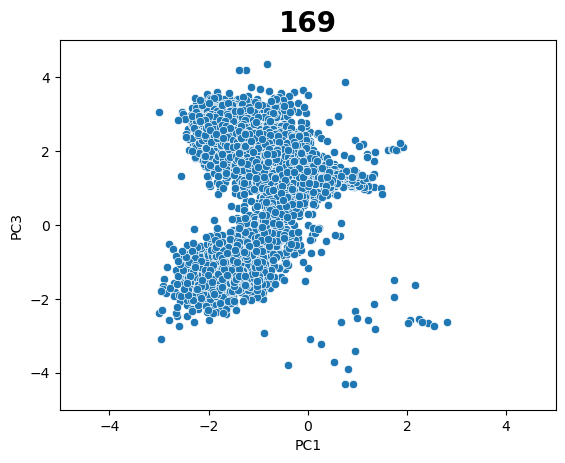

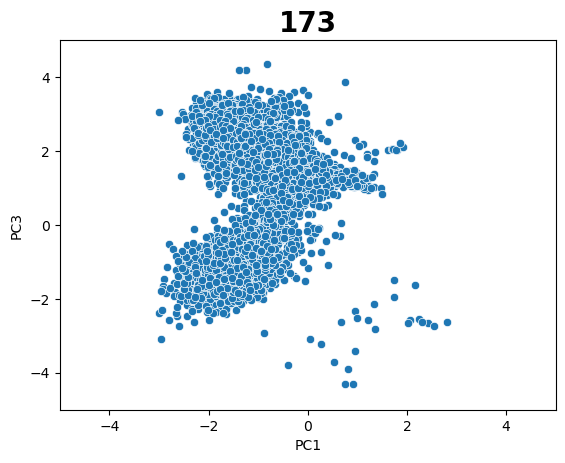

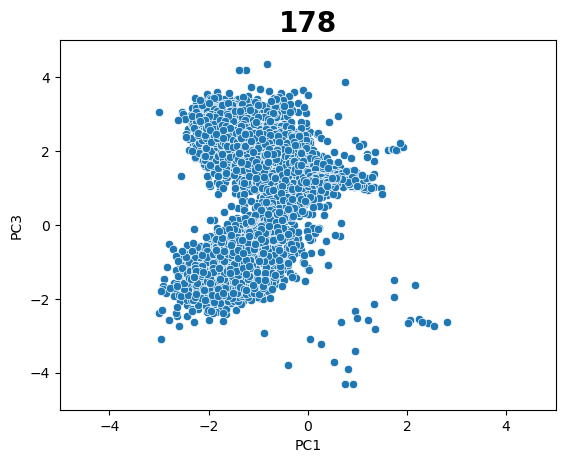

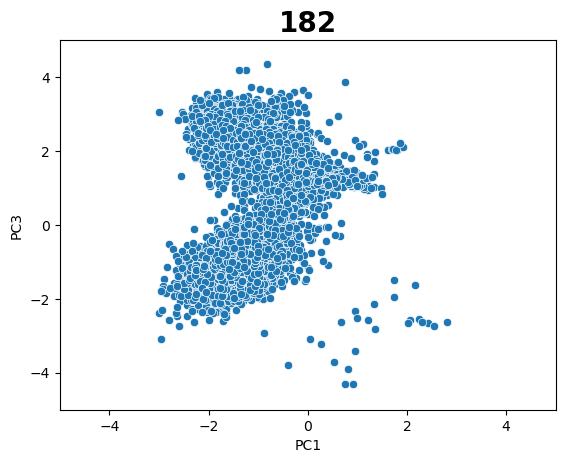

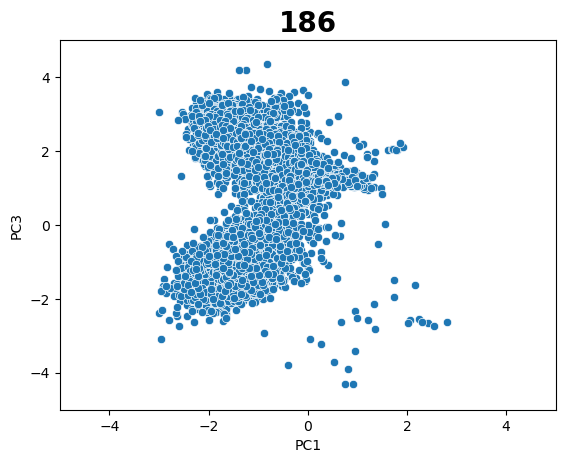

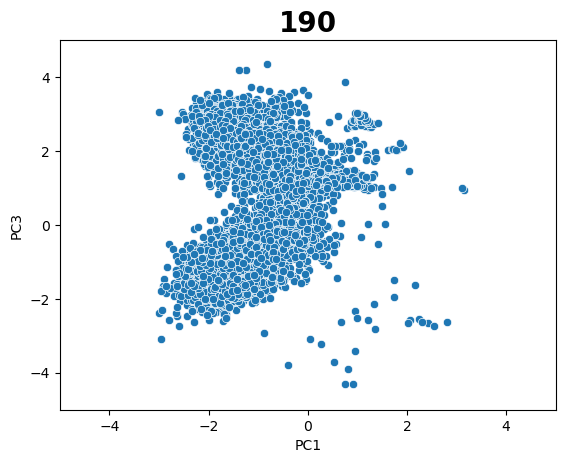

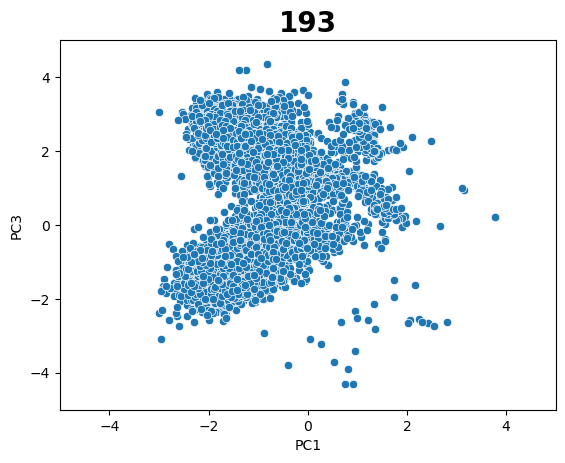

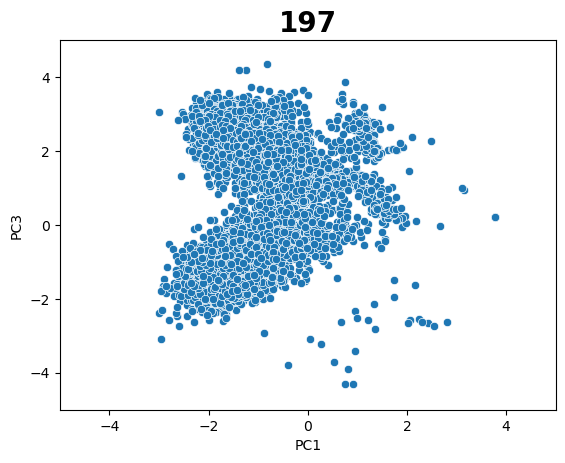

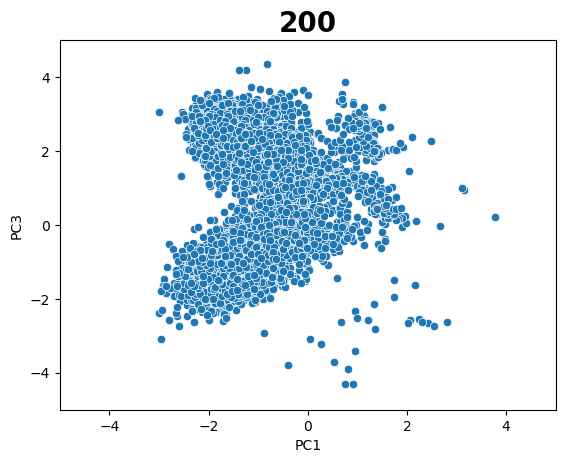

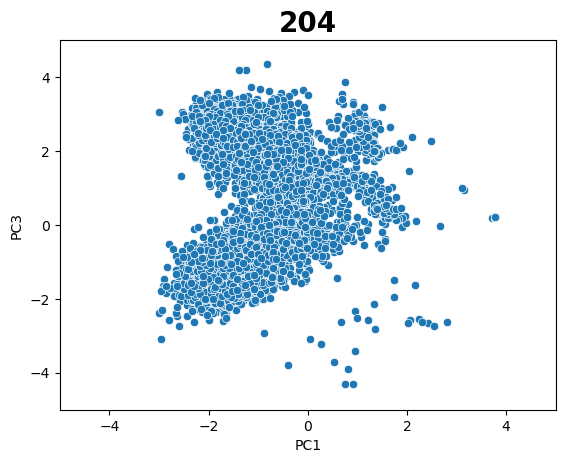

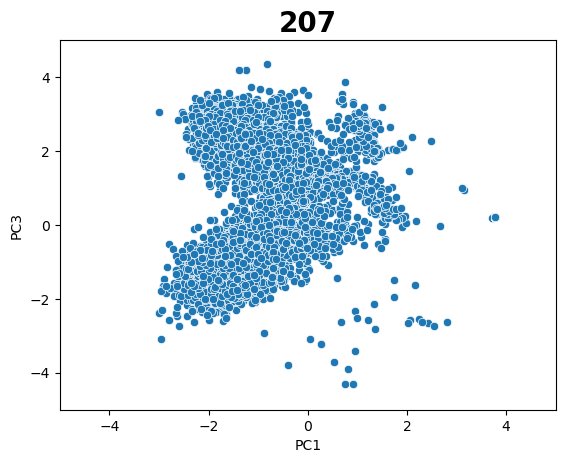

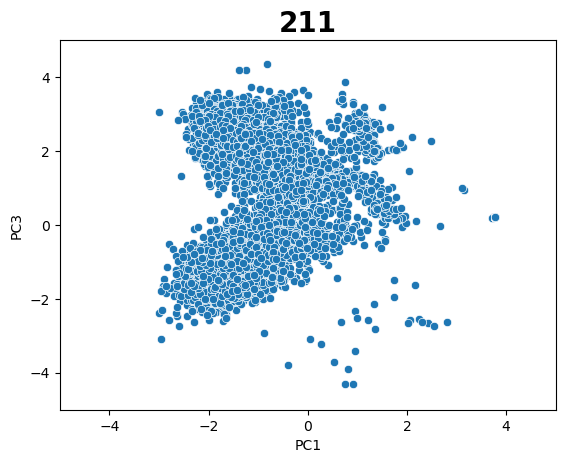

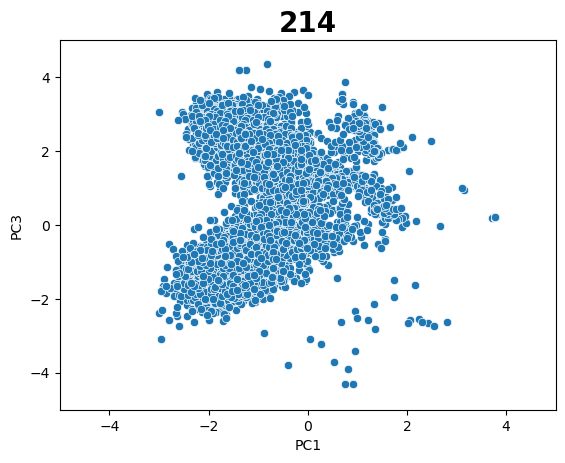

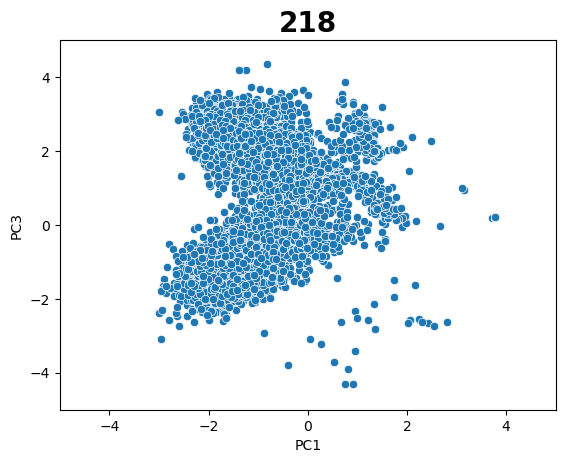

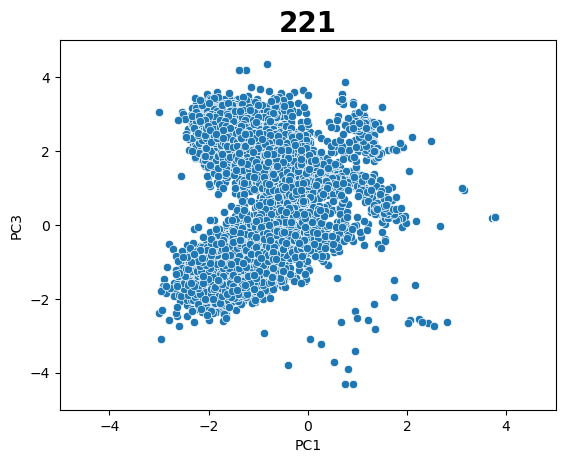

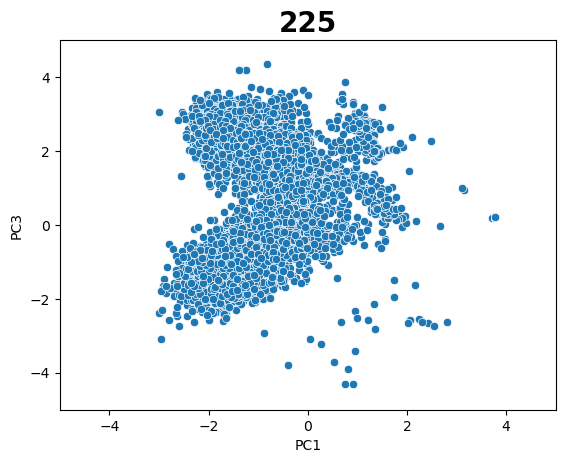

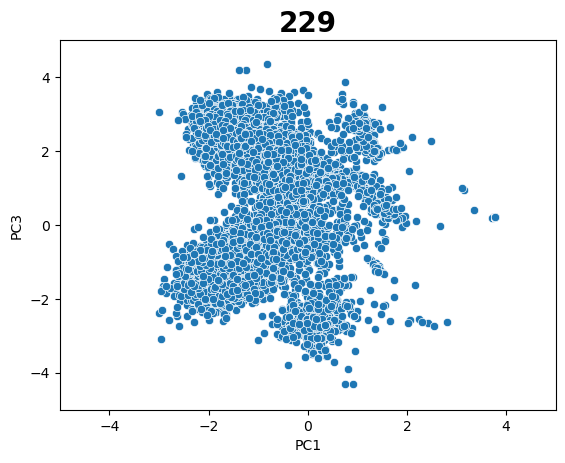

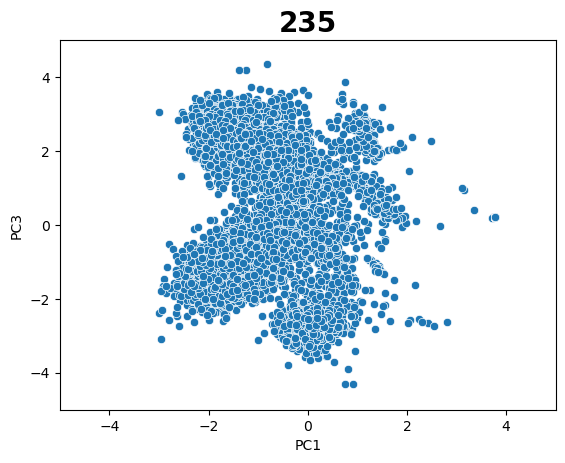

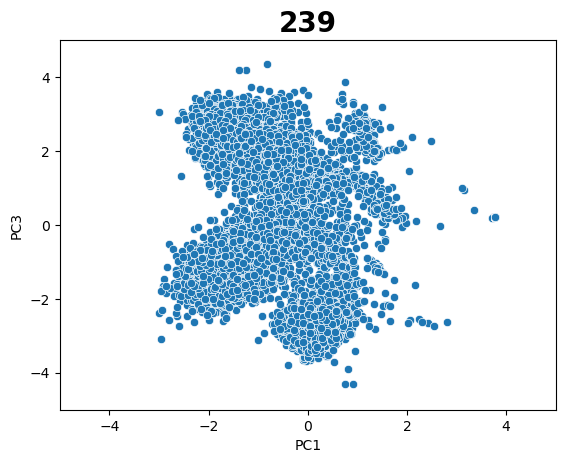

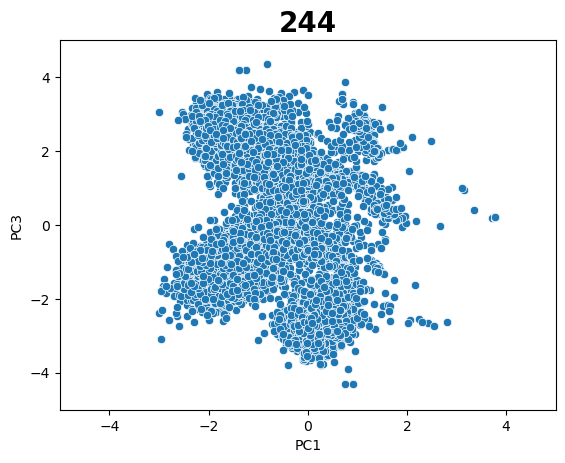

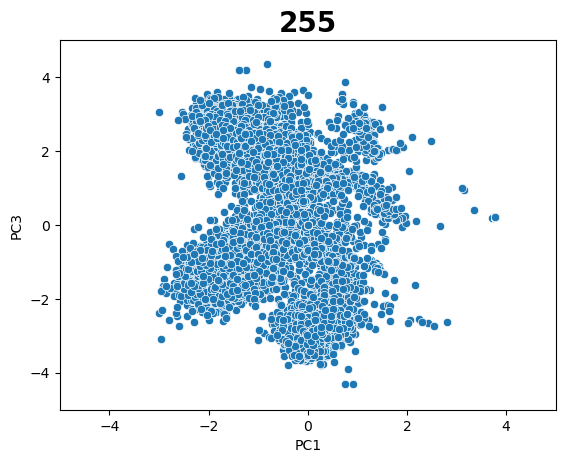

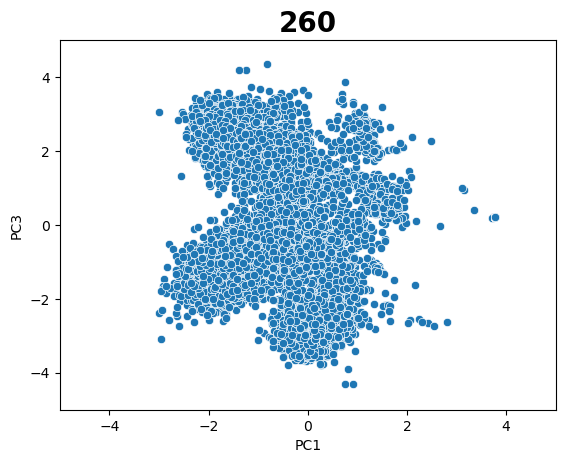

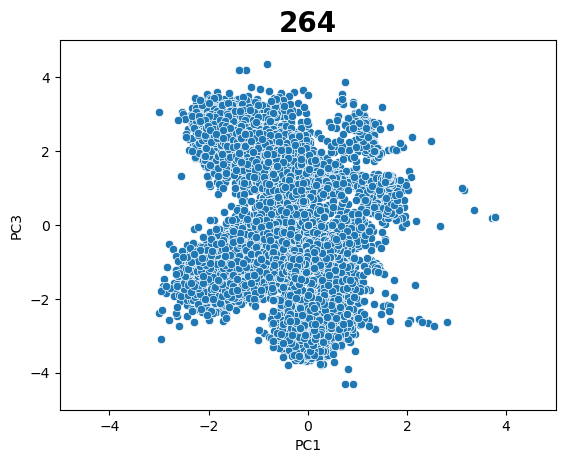

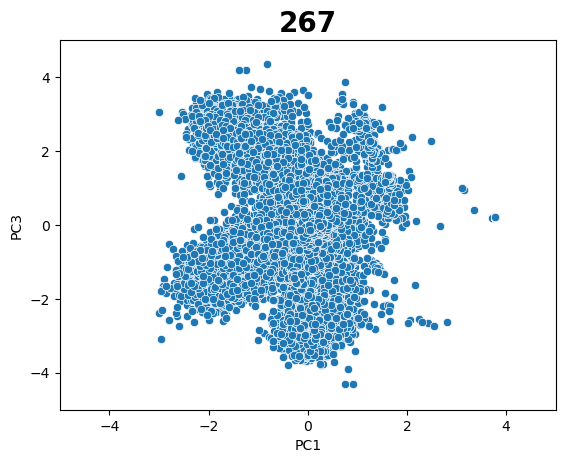

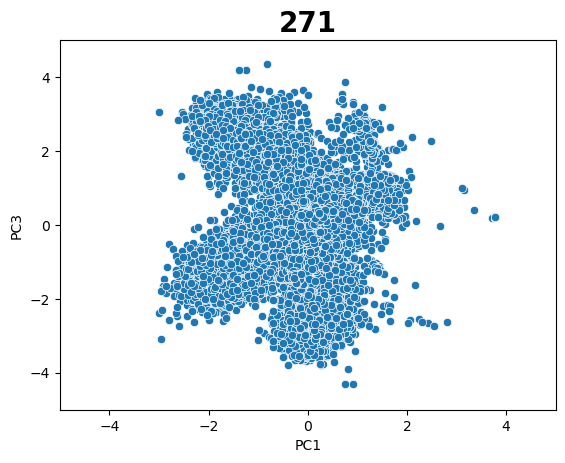

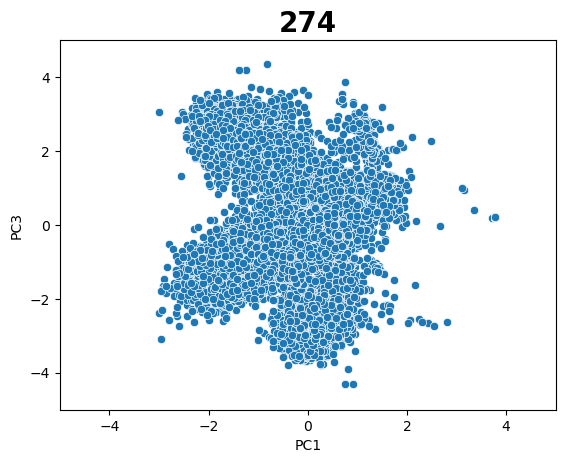

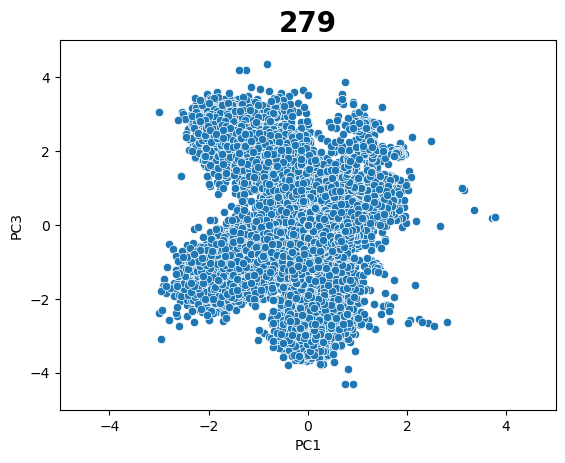

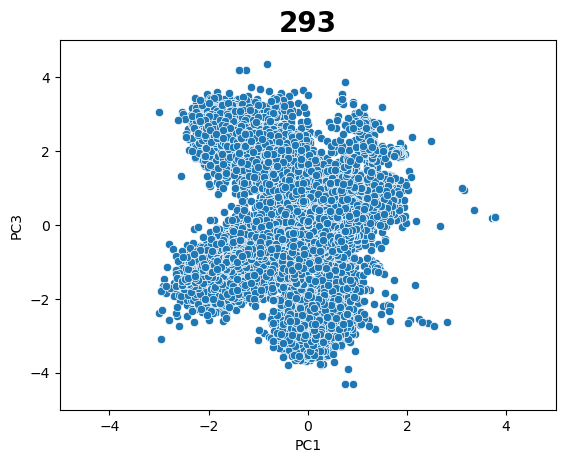

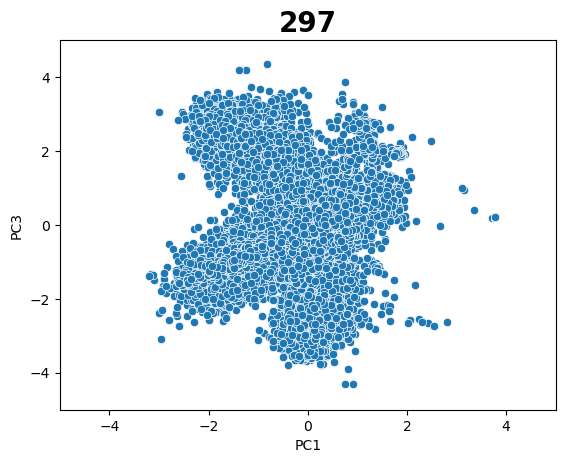

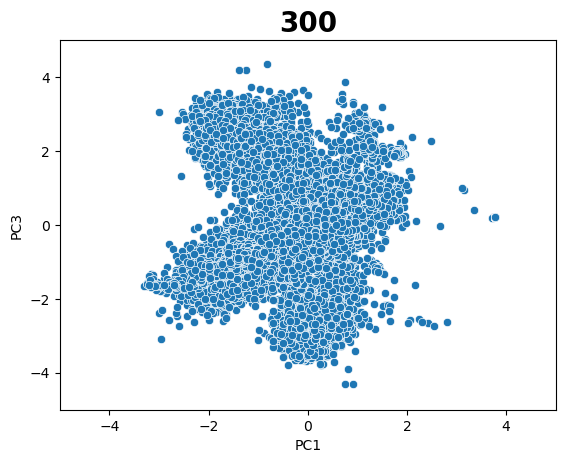

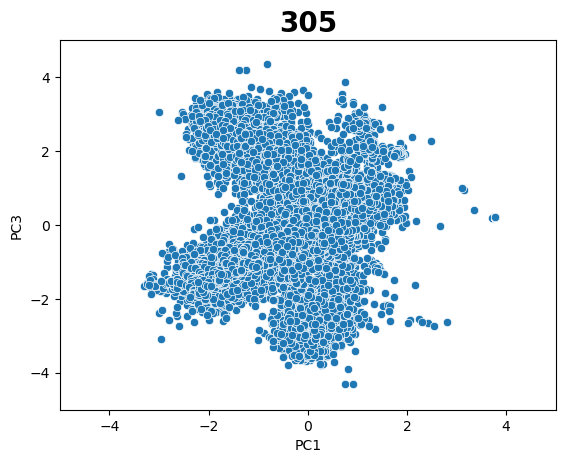

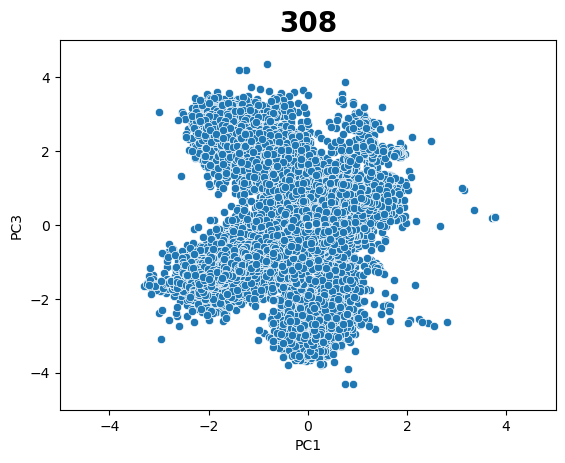

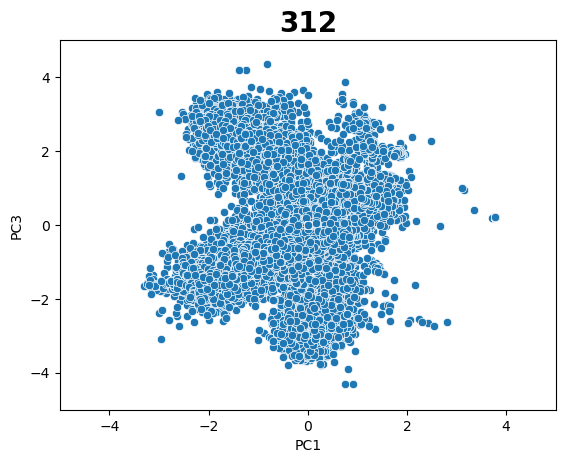

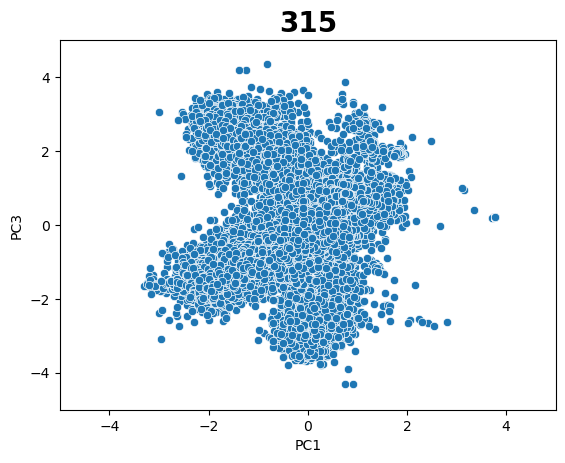

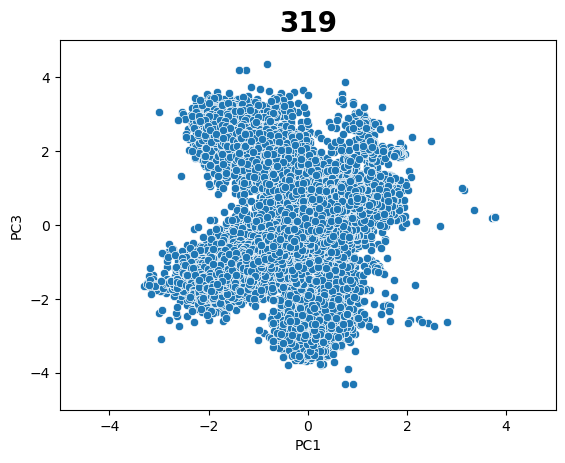

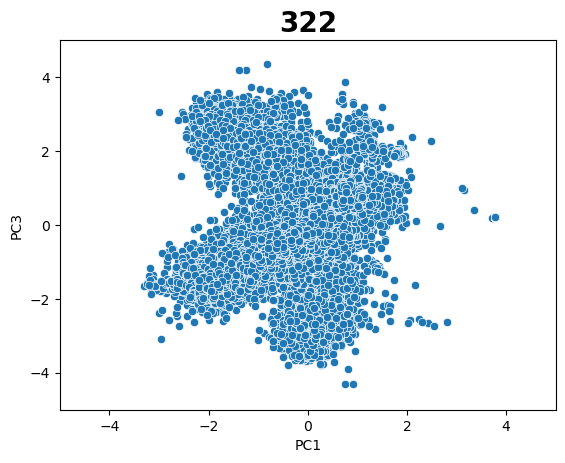

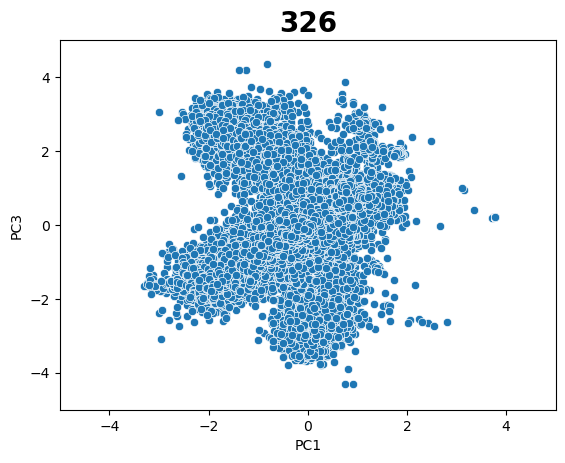

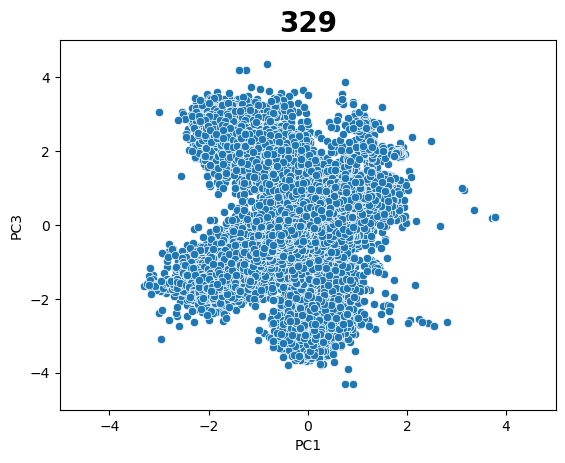

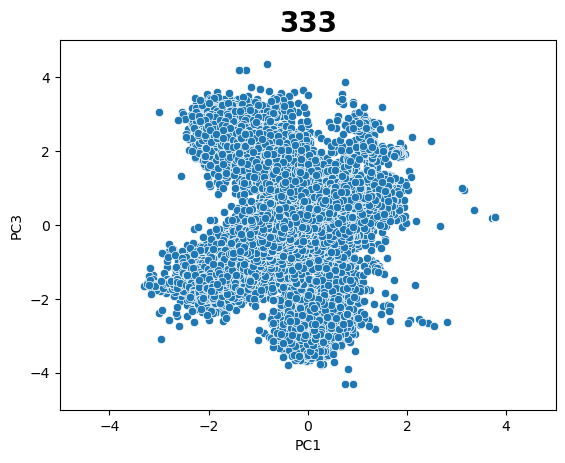

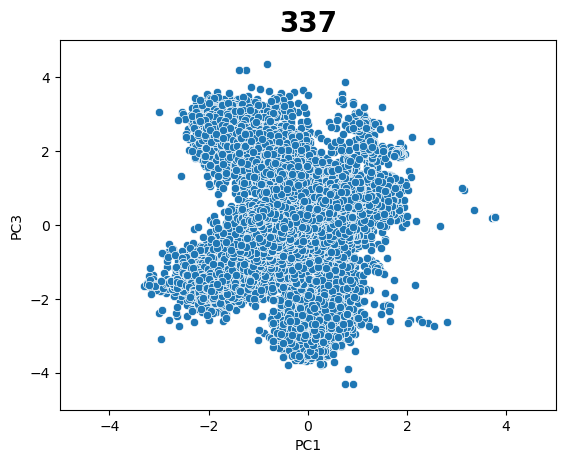

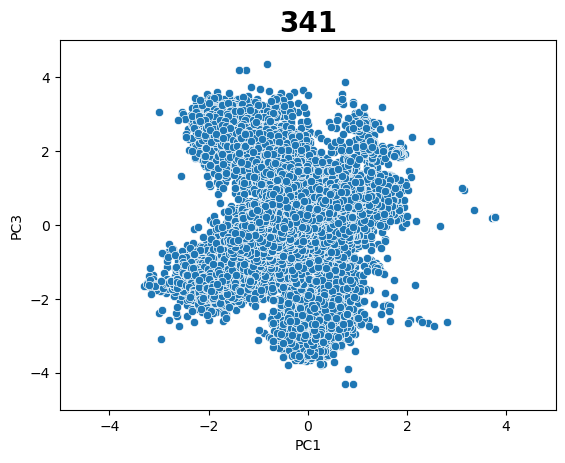

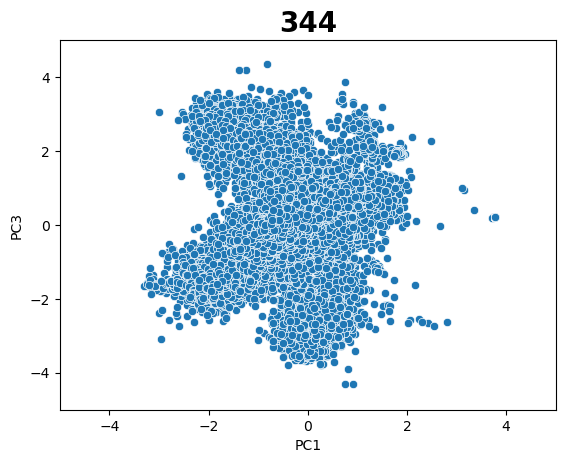

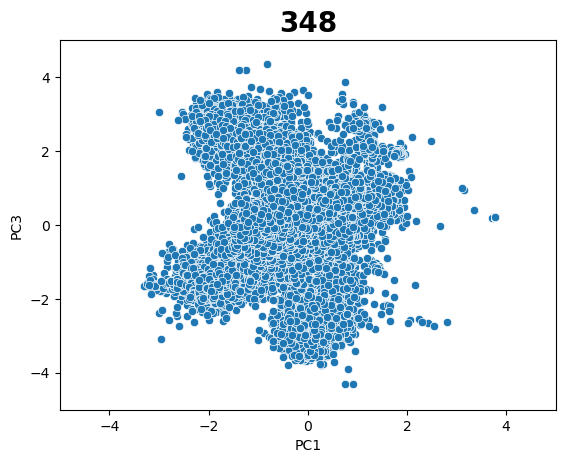

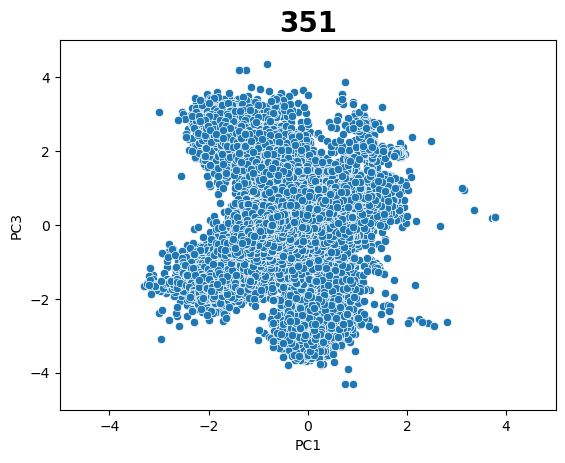

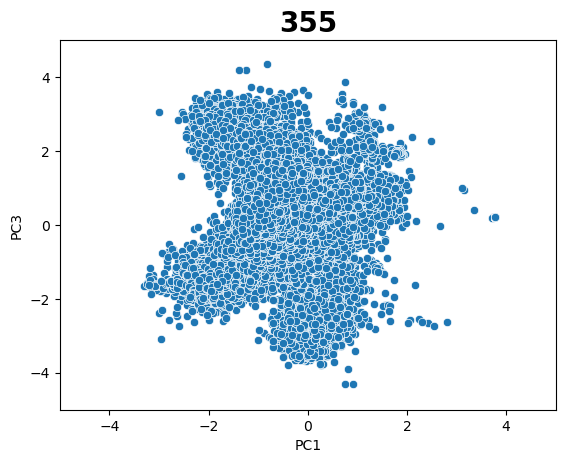

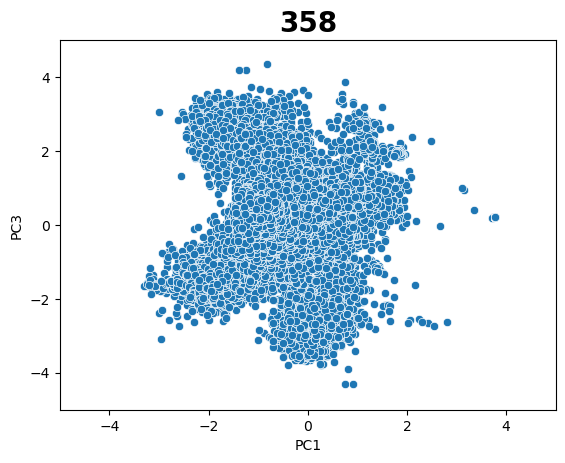

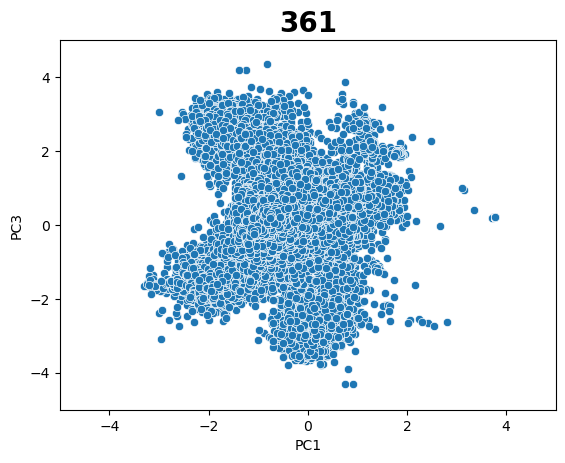

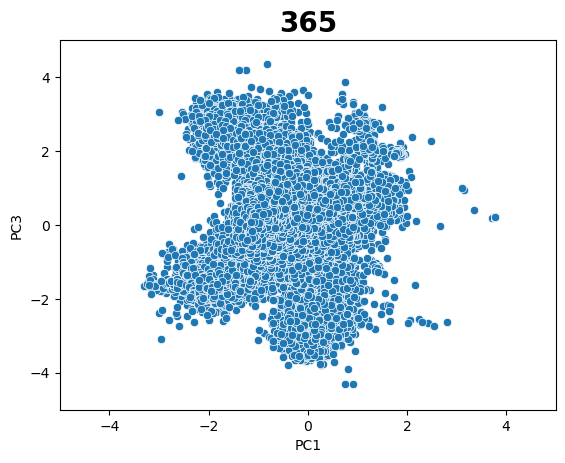

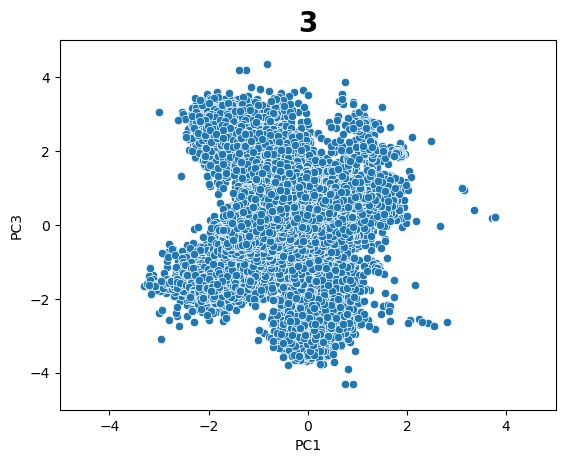

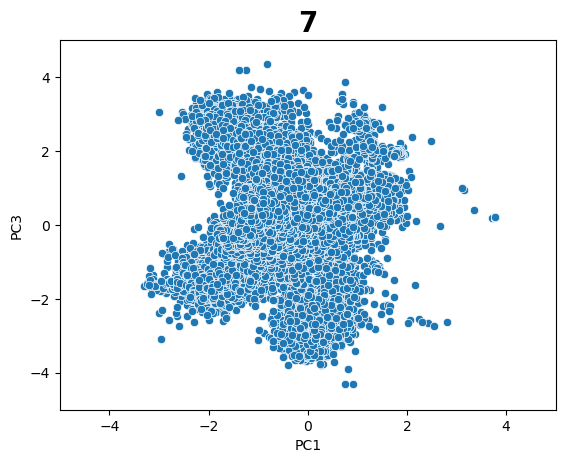

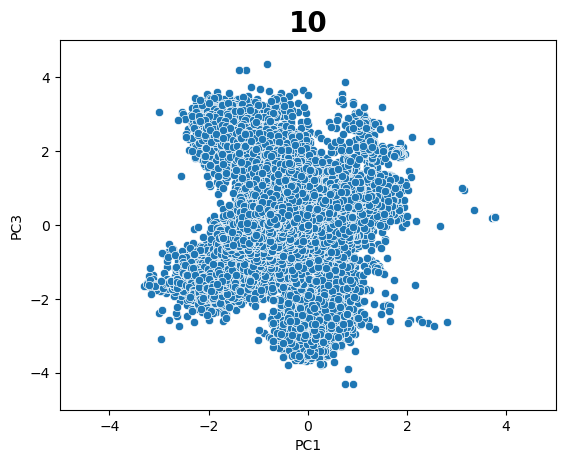

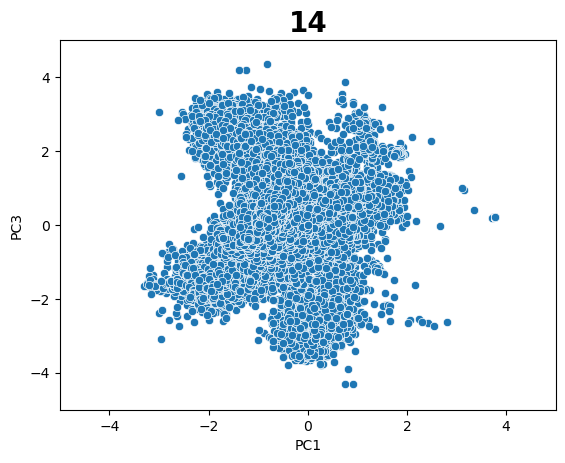

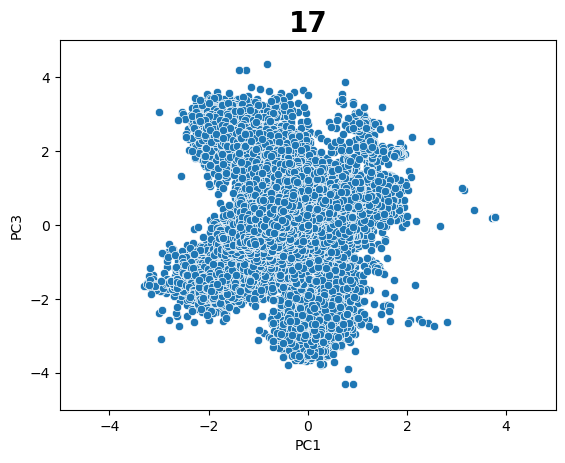

<Figure size 640x480 with 0 Axes>

In [42]:
%matplotlib inline


images = []
folder='/Users/aengin/Coursera/vib/images'

if not os.path.exists(folder):
    os.mkdir(folder)

for k in range(0, len(reduced_df),500):

    plt.axis((-5, 5, -5, 5))

    sns.scatterplot(data=reduced_df.iloc[0:k],x="PC1",y="PC3")

    plt.title(f'{reduced_df.index[k].dayofyear}', loc='center', fontsize=20, color='black', fontweight='bold')
    #plt.title(f'inspired by Hans Rosling', loc='right', fontsize=10, color='grey', style='italic', pad=-20)

    #plt.legend(bbox_to_anchor=(0.74, 0.85), loc='center')

    plt.xlabel('PC1')
    plt.ylabel('PC3')
    #plt.annotate({country}, )

    filename = f'PCA_{reduced_df.index[k].dayofyear}.png'

    plt.savefig(os.path.join(folder,filename))

    images.append(imageio.imread(os.path.join(folder,filename)))

    plt.figure()

imageio.mimsave(os.path.join(folder,'scatterplot.gif'), images, fps=5000)

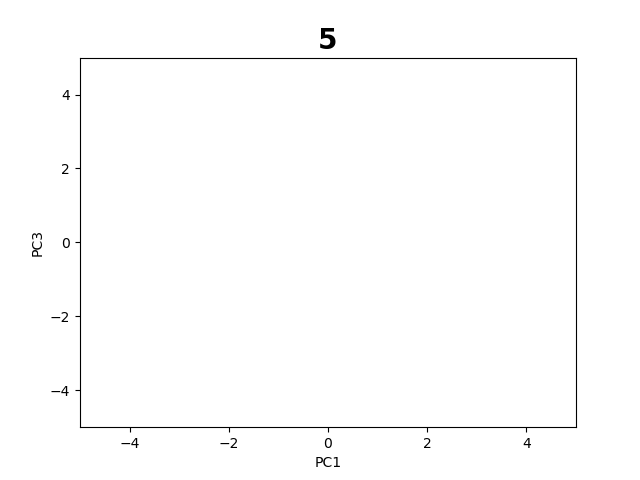

In [43]:

Image('/Users/aengin/Coursera/vib/images/scatterplot.gif')

In [25]:
reduced_df.index[0]

Timestamp('2022-01-05 19:50:00')

In [24]:
dd.dayofyear

5

In [28]:
dd2=reduced_df.index[1000]

In [29]:
dd2.dayofyear

14

In [30]:
reduced_df.index[1000]

Timestamp('2022-01-14 17:50:00')